# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Set units for temp var:
temp_unit = "metric"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={temp_unit}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | iskateley
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | ola
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | ekibastuz
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | vazante
Processing Record 12 of Set 1 | flin flon
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | jizan
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | nagqu
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | new cairo
City not found. Skipping...
Processing Record 21 of Set 1 | kayangel
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,7.29,85,0,0.59,CL,1712992197
1,longyearbyen,78.2186,15.6401,-8.09,67,75,10.29,SJ,1712992198
2,iskateley,67.6803,53.1512,-16.10,92,32,6.71,RU,1712992198
3,cidreira,-30.1811,-50.2056,21.27,88,100,9.53,BR,1712992198
4,georgetown,5.4112,100.3354,33.96,62,20,5.14,MY,1712992198


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,7.29,85,0,0.59,CL,1712992197
1,longyearbyen,78.2186,15.6401,-8.09,67,75,10.29,SJ,1712992198
2,iskateley,67.6803,53.1512,-16.10,92,32,6.71,RU,1712992198
3,cidreira,-30.1811,-50.2056,21.27,88,100,9.53,BR,1712992198
4,georgetown,5.4112,100.3354,33.96,62,20,5.14,MY,1712992198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

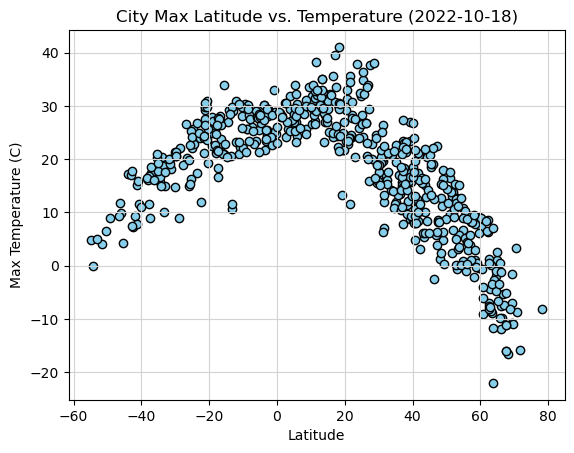

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

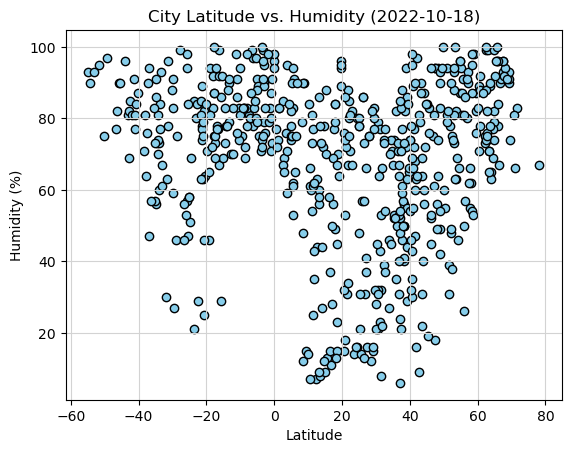

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

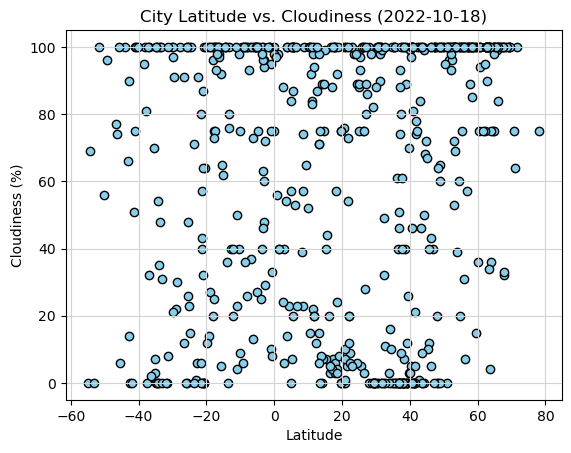

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

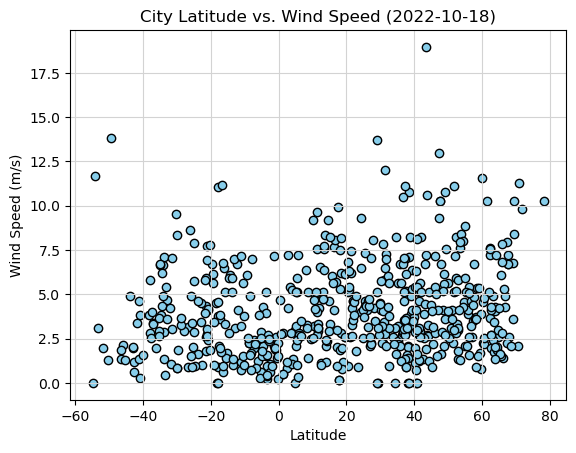

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress_plots(x_values, y_values, title, ylabel, text_coordinates):
        
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Plot data and regression line
    plt.scatter(x_values, y_values, color="blue", edgecolor="black", alpha=0.75)
    plt.plot(x_values, regress_values, color="red")
    
    # Annotate regression equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,-8.09,67,75,10.29,SJ,1712992198
2,iskateley,67.6803,53.1512,-16.10,92,32,6.71,RU,1712992198
4,georgetown,5.4112,100.3354,33.96,62,20,5.14,MY,1712992198
6,ola,59.5833,151.2833,-0.48,87,100,0.76,RU,1712992199
8,ekibastuz,51.6667,75.3667,13.08,39,96,11.10,KZ,1712992200


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,7.29,85,0,0.59,CL,1712992197
3,cidreira,-30.1811,-50.2056,21.27,88,100,9.53,BR,1712992198
5,adamstown,-25.0660,-130.1015,22.11,58,100,5.75,PN,1712992199
7,margaret river,-33.9500,115.0667,20.49,60,35,2.88,AU,1712992200
9,fale old settlement,-9.3852,-171.2468,30.36,75,100,6.09,TK,1712992200


###  Temperature vs. Latitude Linear Regression Plot

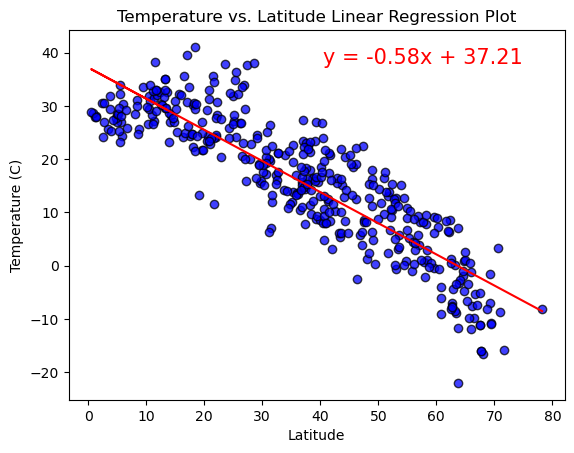

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
lin_regress_plots(x_values, y_values, "Temperature vs. Latitude Linear Regression Plot", "Temperature (C)", (min(x_values) + 40, min(y_values) + 60))

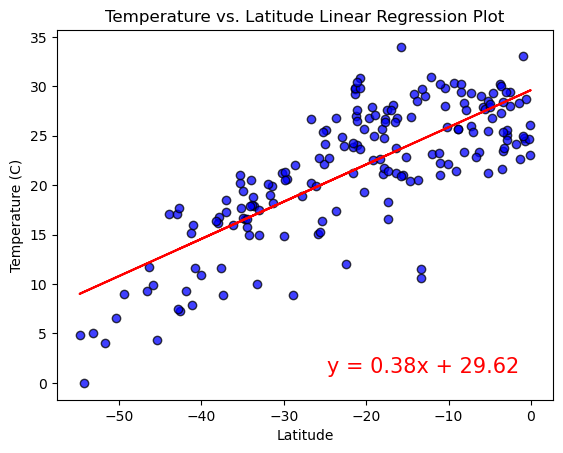

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
lin_regress_plots(x_values, y_values, "Temperature vs. Latitude Linear Regression Plot", "Temperature (C)", (min(x_values) + 30, min(y_values) + 1))

**Discussion about the linear relationship:**

For Northern Hemisphere cities there is a negative association between latitude and temperature in degrees Celsius. In other words, as you move away from the equator (higher latitudes), maximum daily temperatures tend to decrease. Specifically, the regression equation indicates that, for each 1 unit increase in latitude, there is, on average, a 0.54 decrease in maximum daily temperature measured in degrees Celsius. 

For Southern Hemisphere cities the reverse is true. In order words, as you move closer to the equator (latitudes closer to 0), maximum daily tempreatures tend to increase as latitude increases. Specifically, the regression equation indicates that, for each 1 unit increase in latitude, there is, on average, a 0.42 increase in maximum daily temperature measured in degrees Celsius.

### Humidity vs. Latitude Linear Regression Plot

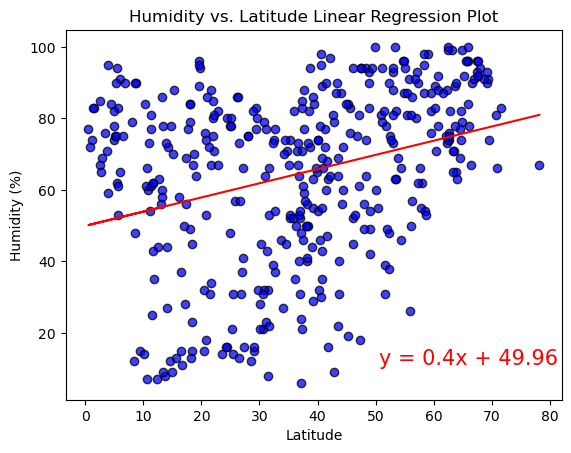

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
lin_regress_plots(x_values, y_values, "Humidity vs. Latitude Linear Regression Plot", "Humidity (%)", (min(x_values) + 50, min(y_values) + 5))

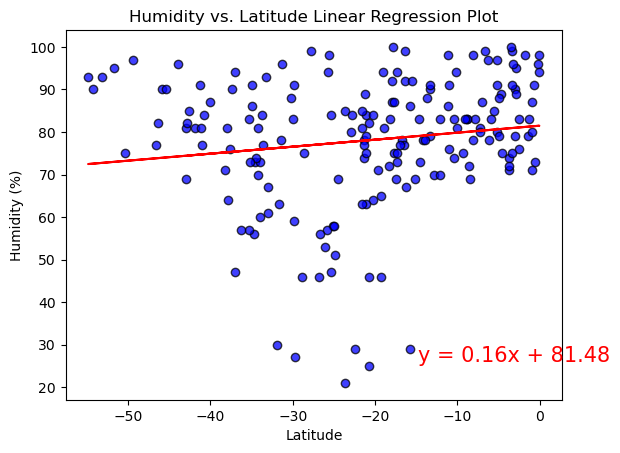

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
lin_regress_plots(x_values, y_values, "Humidity vs. Latitude Linear Regression Plot", "Humidity (%)", (min(x_values) + 40, min(y_values) + 5))

**Discussion about the linear relationship:** 

Compared with the relationship between latitude and maximum daily temperature (measured in degrees Celisus), the relationship between latitude and humidity (%) is not as significant. 

For both Northern and Southern Hemisphere cities, there is a slight positive association between latitude and humidity (%). For Northern Hemisphere cities, for each 1 unit increase in latitude there is, on average, a 0.28 increase in humidity. For Southern Hemisphere locations, for each 1 unit increase in latitude there is, on average, a 0.26 increase in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

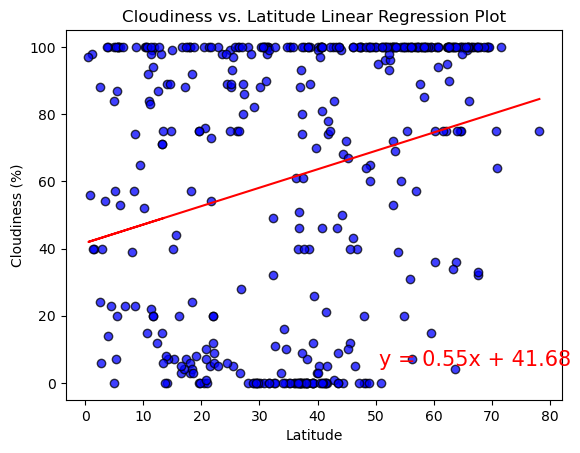

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
lin_regress_plots(x_values, y_values, "Cloudiness vs. Latitude Linear Regression Plot", "Cloudiness (%)", (min(x_values) + 50, min(y_values) + 5))

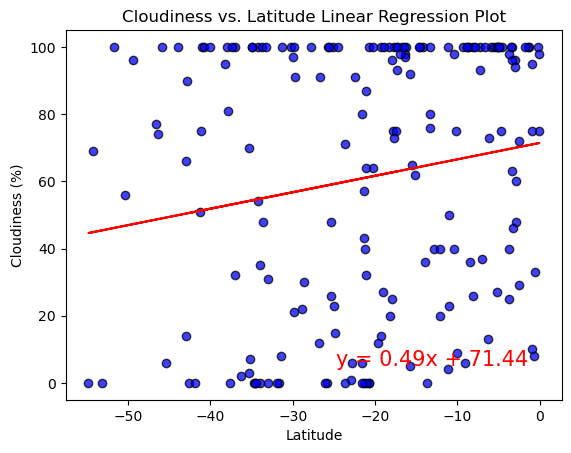

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
lin_regress_plots(x_values, y_values, "Cloudiness vs. Latitude Linear Regression Plot", "Cloudiness (%)", (min(x_values) + 30, min(y_values) + 5))

**Discussion about the linear relationship:** 

Compared with the relationship between latitude and maximum daily temperature (measured in degrees Celisus), the relationship between latitude and cloudiness (%) is not as significant. 

For both Northern and Southern Hemisphere cities, there is a slight positive association between latitude and cloudiness (%). For Northern Hemisphere cities, for each 1 unit increase in latitude there is, on average, a 0.25 increase in cloudiness. For Southern Hemisphere locations, for each 1 unit increase in latitude there is, on average, a 0.38 increase in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

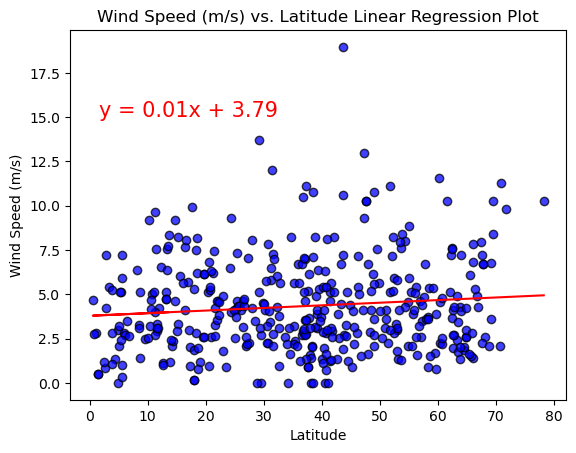

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
lin_regress_plots(x_values, y_values, "Wind Speed (m/s) vs. Latitude Linear Regression Plot", "Wind Speed (m/s)", (min(x_values) + 1, min(y_values) + 15))

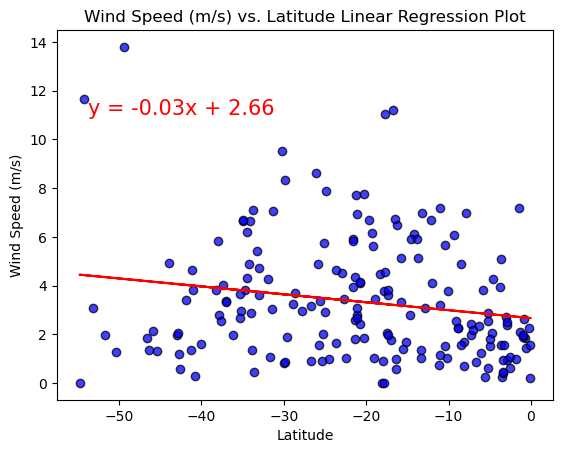

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
lin_regress_plots(x_values, y_values, "Wind Speed (m/s) vs. Latitude Linear Regression Plot", "Wind Speed (m/s)", (min(x_values) + 1, min(y_values) + 11))

**Discussion about the linear relationship:** 

Compared with the relationship between latitude and maximum daily temperature (measured in degrees Celisus), the relationship between latitude and wind speed (m/s) is not as significant.

For Northern Hemisphere cities, there is a slight positive association between latitude and wind speed (m/s). For each 1 unit increase in latitude there is, on average, a 0.02 increase in wind speed (m/s). For Southern Hemisphere locations, the reverse is true and a sligh negative association between latitude and wind speed (m/s) is evident. For each 1 unit increase in latitude there is, on average, a 0.04 decrease in wind speed (m/s).